In [1]:
import pandas as pd
temperatures = pd.read_csv("data/1_Daily_minimum_temps.csv", header=0, index_col=0, parse_dates=True, date_format="%d/%m/%Y")

dataframe = pd.DataFrame()
dataframe['year'] = pd.DatetimeIndex(temperatures.index).year
dataframe['month'] = pd.DatetimeIndex(temperatures.index).month
dataframe['day'] = pd.DatetimeIndex(temperatures.index).day
dataframe['tempature'] = temperatures["Temp"].values

dataframe.head(10)

,year,month,day,tempature
0,1981,1,1,20.7
1,1981,1,2,17.9
2,1981,1,3,18.8
3,1981,1,4,14.6
4,1981,1,5,15.8
5,1981,1,6,15.8
6,1981,1,7,15.8
7,1981,1,8,17.4
8,1981,1,9,21.8
9,1981,1,10,20.0


In [2]:
dataframe = pd.DataFrame()
dataframe['t'] = temperatures["Temp"].shift(1).values
dataframe['t+1'] = temperatures["Temp"].values

dataframe.head(10)

,t,t+1
0,NaN,20.7
1,20.7,17.9
2,17.9,18.8
3,18.8,14.6
4,14.6,15.8
5,15.8,15.8
6,15.8,15.8
7,15.8,17.4
8,17.4,21.8
9,21.8,20.0


In [3]:
dataframe = pd.DataFrame(temperatures.values)

dataframe = pd.concat([dataframe.shift(2), dataframe.shift(1), dataframe], axis=1)
dataframe.columns = ["t-2", "t-1", "t"]

dataframe.head(10)

,t-2,t-1,t
0,NaN,NaN,20.7
1,NaN,20.7,17.9
2,20.7,17.9,18.8
3,17.9,18.8,14.6
4,18.8,14.6,15.8
5,14.6,15.8,15.8
6,15.8,15.8,15.8
7,15.8,15.8,17.4
8,15.8,17.4,21.8
9,17.4,21.8,20.0


In [4]:
temps = pd.DataFrame(temperatures.values)

means = temps.rolling(window=2).mean()

dataframe = pd.DataFrame(temperatures.values)
dataframe =  pd.concat([means, temps.shift(1), temps], axis=1) 
dataframe.columns = ["means(t-1, t)", "t-1", "t"]

dataframe.head(10)

,"means(t-1, t)",t-1,t
0,NaN,NaN,20.7
1,19.30,20.7,17.9
2,18.35,17.9,18.8
3,16.70,18.8,14.6
4,15.20,14.6,15.8
5,15.80,15.8,15.8
6,15.80,15.8,15.8
7,16.60,15.8,17.4
8,19.60,17.4,21.8
9,20.90,21.8,20.0


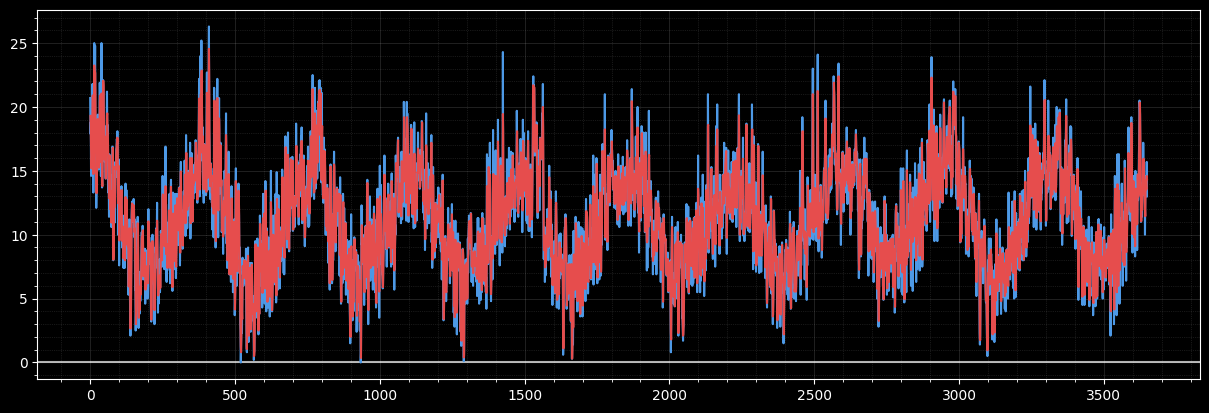

In [22]:
import matplotlib.pyplot as plt
import numpy

plt.style.use('dark_background')
fig, ax = plt.subplots()

fig.set_figwidth(15)

ax.grid(True)
# Show the major grid and style it slightly.
ax.grid(which='major', color='#DDDDDD', linewidth=0.5, alpha=0.2)
# Show the minor grid as well. Style it in very light gray as a thin,
# dotted line.
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5,alpha=0.2)
# Make the minor ticks and gridlines show.
ax.minorticks_on()
ax.axhline(y=0.0, color='w', linestyle='-', alpha=0.7)

X1 = dataframe['t'].index
Y1 = dataframe['t'].values
ax.plot(X1, Y1, "-", color=[0.3,0.6,0.9])

X2 = dataframe['means(t-1, t)'].index
Y2 = dataframe['means(t-1, t)'].values
ax.plot(X2, Y2, "-", color=[0.9,0.3,0.3])


In [49]:
temps = pd.DataFrame(temperatures.values)

means20  = temps.rolling(window=20 ).mean()
means40  = temps.rolling(window=40 ).mean()
means80  = temps.rolling(window=80 ).mean()
means160 = temps.rolling(window=160).mean()

dataframe = pd.DataFrame(temperatures.values)
dataframe =  pd.concat([means20, means40, means80, means160, temps], axis=1)
dataframe.columns = ["means20","means40", "means80","means160", "t"]

dataframe.head(10)

,means20,means40,means80,means160,t
0,NaN,NaN,NaN,NaN,20.7
1,NaN,NaN,NaN,NaN,17.9
2,NaN,NaN,NaN,NaN,18.8
3,NaN,NaN,NaN,NaN,14.6
4,NaN,NaN,NaN,NaN,15.8
5,NaN,NaN,NaN,NaN,15.8
6,NaN,NaN,NaN,NaN,15.8
7,NaN,NaN,NaN,NaN,17.4
8,NaN,NaN,NaN,NaN,21.8
9,NaN,NaN,NaN,NaN,20.0


In [50]:
dataframe['t'].values.mean()

11.177753424657535

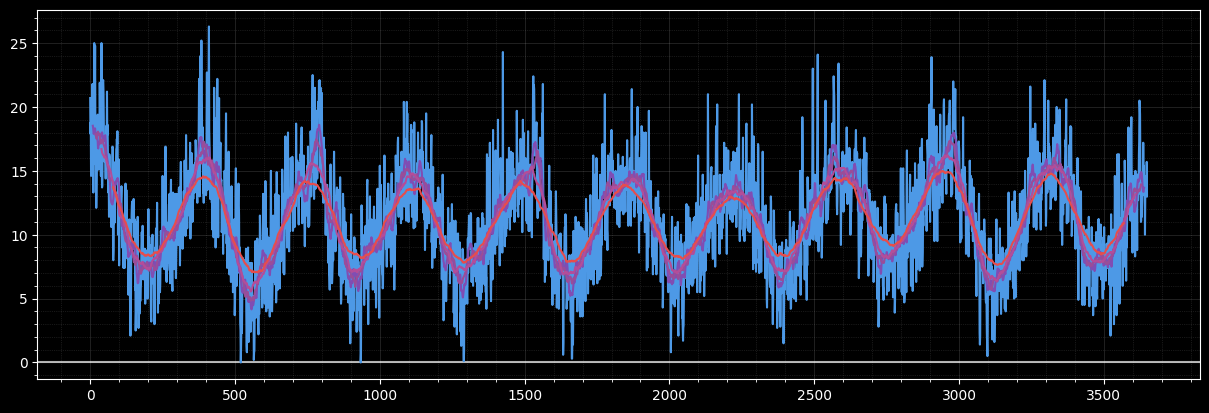

In [51]:
import matplotlib.pyplot as plt
import numpy

plt.style.use('dark_background')
fig, ax = plt.subplots()

fig.set_figwidth(15)

ax.grid(True)
# Show the major grid and style it slightly.
ax.grid(which='major', color='#DDDDDD', linewidth=0.5, alpha=0.2)
# Show the minor grid as well. Style it in very light gray as a thin,
# dotted line.
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5,alpha=0.2)
# Make the minor ticks and gridlines show.
ax.minorticks_on()
ax.axhline(y=0.0, color='w', linestyle='-', alpha=0.7)

X1 = dataframe['t'].index
Y1 = dataframe['t'].values
ax.plot(X1, Y1, "-", color=[0.3,0.6,0.9])

X2 = dataframe['means20'].shift(-10).index
Y2 = dataframe['means20'].shift(-10).values
ax.plot(X2, Y2, "-", color=[0.5,0.3,0.7])

X2 = dataframe['means40'].shift(-20).index
Y2 = dataframe['means40'].shift(-20).values
ax.plot(X2, Y2, "-", color=[0.6,0.3,0.6])

X2 = dataframe['means80'].shift(-40).index
Y2 = dataframe['means80'].shift(-40).values
ax.plot(X2, Y2, "-", color=[0.7,0.3,0.6])

X2 = dataframe['means160'].shift(-80).index
Y2 = dataframe['means160'].shift(-80).values
ax.plot(X2, Y2, "-", color=[0.9,0.3,0.3])